# Import data

In [7]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt

import warnings
warnings.filterwarnings('ignore')
sns.set_palette(['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])


In [11]:
folder_path = '/content/sample_data/dataset'  # Replace 'your_folder_name' with your folder's name
files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
for file_path in files:
    df = pd.read_csv(file_path)
    df.head()


In [12]:
df.shape

(12011, 6)

# Data cleaning

In [13]:
#Exclude header for each dataset inside dataframe
df = df[df['Order ID'] != 'Order ID']

In [14]:
df = df.reset_index()
df = df.drop(columns='index')

In [15]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5829,242271,AA Batteries (4-pack),1,3.84,08/28/19 05:57,"56 14th St, Austin, TX 73301"
8782,245084,Apple Airpods Headphones,1,150,08/02/19 16:27,"487 Forest St, Seattle, WA 98101"
557,237214,34in Ultrawide Monitor,1,379.99,08/26/19 17:55,"908 Madison St, San Francisco, CA 94016"
4515,241014,AA Batteries (4-pack),2,3.84,08/25/19 15:09,"665 Highland St, San Francisco, CA 94016"
3641,240178,ThinkPad Laptop,1,999.99,08/03/19 10:09,"708 Spruce St, Seattle, WA 98101"


In [16]:
#Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11985 entries, 0 to 11984
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          11957 non-null  object
 1   Product           11957 non-null  object
 2   Quantity Ordered  11957 non-null  object
 3   Price Each        11957 non-null  object
 4   Order Date        11957 non-null  object
 5   Purchase Address  11957 non-null  object
dtypes: object(6)
memory usage: 561.9+ KB


There is feature that have incorrect type in Quantity Ordered, Price Each and Order Date.

In [17]:
#Check null values
df.isna().sum()

Order ID            28
Product             28
Quantity Ordered    28
Price Each          28
Order Date          28
Purchase Address    28
dtype: int64

In [18]:
#Check null values
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
310,NaN,NaN,NaN,NaN,NaN,NaN
1220,NaN,NaN,NaN,NaN,NaN,NaN
2639,NaN,NaN,NaN,NaN,NaN,NaN
2675,NaN,NaN,NaN,NaN,NaN,NaN
3109,NaN,NaN,NaN,NaN,NaN,NaN
3300,NaN,NaN,NaN,NaN,NaN,NaN
4277,NaN,NaN,NaN,NaN,NaN,NaN
4293,NaN,NaN,NaN,NaN,NaN,NaN
4443,NaN,NaN,NaN,NaN,NaN,NaN
4667,NaN,NaN,NaN,NaN,NaN,NaN


Missing values caused by no entry avalaible.

In [19]:
#Drop null vales
df = df.dropna()

# Data preparation

In [20]:
#Correcting data types
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float')
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [21]:
#Adding new feature
def feature_extraction(data):

    # funtction to get the city in the data
    def get_city(address):
        return address.split(',')[1]

    # funtction to get the state in the data
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    # let's get the year data in order date column
    data['Year'] = data['Order Date'].dt.year

    # let's get the month data in order date column
    data['Month'] = data['Order Date'].dt.month

    # let's get the houe data in order date column
    data['Hour'] = data['Order Date'].dt.hour

    # let's get the minute data in order date column
    data['Minute'] = data['Order Date'].dt.minute

    # let's make the sales column by multiplying the quantity ordered colum with price each column
    data['Sales'] = data['Quantity Ordered'] * data['Price Each']

    # let's get the cities data in order date column
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

    return data

In [22]:
df = feature_extraction(df)
df.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
4402,240906,AA Batteries (4-pack),1,3.84,2019-08-21 09:19:00,"736 Cherry St, Portland, OR 97035",2019,8,9,19,3.84,Portland (OR)
1018,237653,AA Batteries (4-pack),1,3.84,2019-08-29 14:56:00,"93 10th St, San Francisco, CA 94016",2019,8,14,56,3.84,San Francisco (CA)
9903,246160,27in FHD Monitor,1,149.99,2019-08-05 19:13:00,"339 Hickory St, San Francisco, CA 94016",2019,8,19,13,149.99,San Francisco (CA)


# Analysis

## Descriptive analysis
descriptive statistic is a summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics is the process of using and analysing those statistics.

In [23]:
df.describe()

,Quantity Ordered,Price Each,Order Date,Year,Month,Hour,Minute,Sales
count,11957.000000,11957.000000,11957,11957.0,11957.000000,11957.000000,11957.000000,11957.000000
mean,1.124195,186.526443,2019-08-16 17:39:15.651083008,2019.0,8.001004,14.409467,29.581166,187.706976
min,1.000000,2.990000,2019-08-01 04:50:00,2019.0,8.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019-08-08 21:35:00,2019.0,8.000000,11.000000,15.000000,11.950000
50%,1.000000,14.950000,2019-08-16 15:12:00,2019.0,8.000000,15.000000,30.000000,14.950000
75%,1.000000,150.000000,2019-08-24 13:43:00,2019.0,8.000000,19.000000,45.000000,150.000000
max,8.000000,1700.000000,2019-09-01 04:45:00,2019.0,9.000000,23.000000,59.000000,1700.000000
std,0.449580,332.301935,NaN,0.0,0.031665,5.430399,17.315530,332.354406


There is still data in year 2020, lets exclude them.

In [24]:
#Select only for year 2019
df = df[df['Year']==2019]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11957 entries, 0 to 11984
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          11957 non-null  object        
 1   Product           11957 non-null  object        
 2   Quantity Ordered  11957 non-null  int64         
 3   Price Each        11957 non-null  float64       
 4   Order Date        11957 non-null  datetime64[ns]
 5   Purchase Address  11957 non-null  object        
 6   Year              11957 non-null  int32         
 7   Month             11957 non-null  int32         
 8   Hour              11957 non-null  int32         
 9   Minute            11957 non-null  int32         
 10  Sales             11957 non-null  float64       
 11  Cities            11957 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(4)
memory usage: 1.0+ MB


In [26]:
total_year_order = df.shape[0]
total_product_sold = df['Quantity Ordered'].sum()
total_year_sales = df['Sales'].sum()

print(f'Total orders in 2019 : {total_year_order:,} orders')
print(f'Total products sold in 2019 : {total_product_sold:,} items')
print(f'Total sales in 2019 : {total_year_sales:,} USD')

Total orders in 2019 : 11,957 orders
Total products sold in 2019 : 13,442 items
Total sales in 2019 : 2,244,412.3099999996 USD


## Univariate analysis
Univariate analysis is basically the simplest form to analyze data. The major reason for univariate analysis is to use the data to describe. The analysis will take data, summarise it, and then find some pattern in the data.

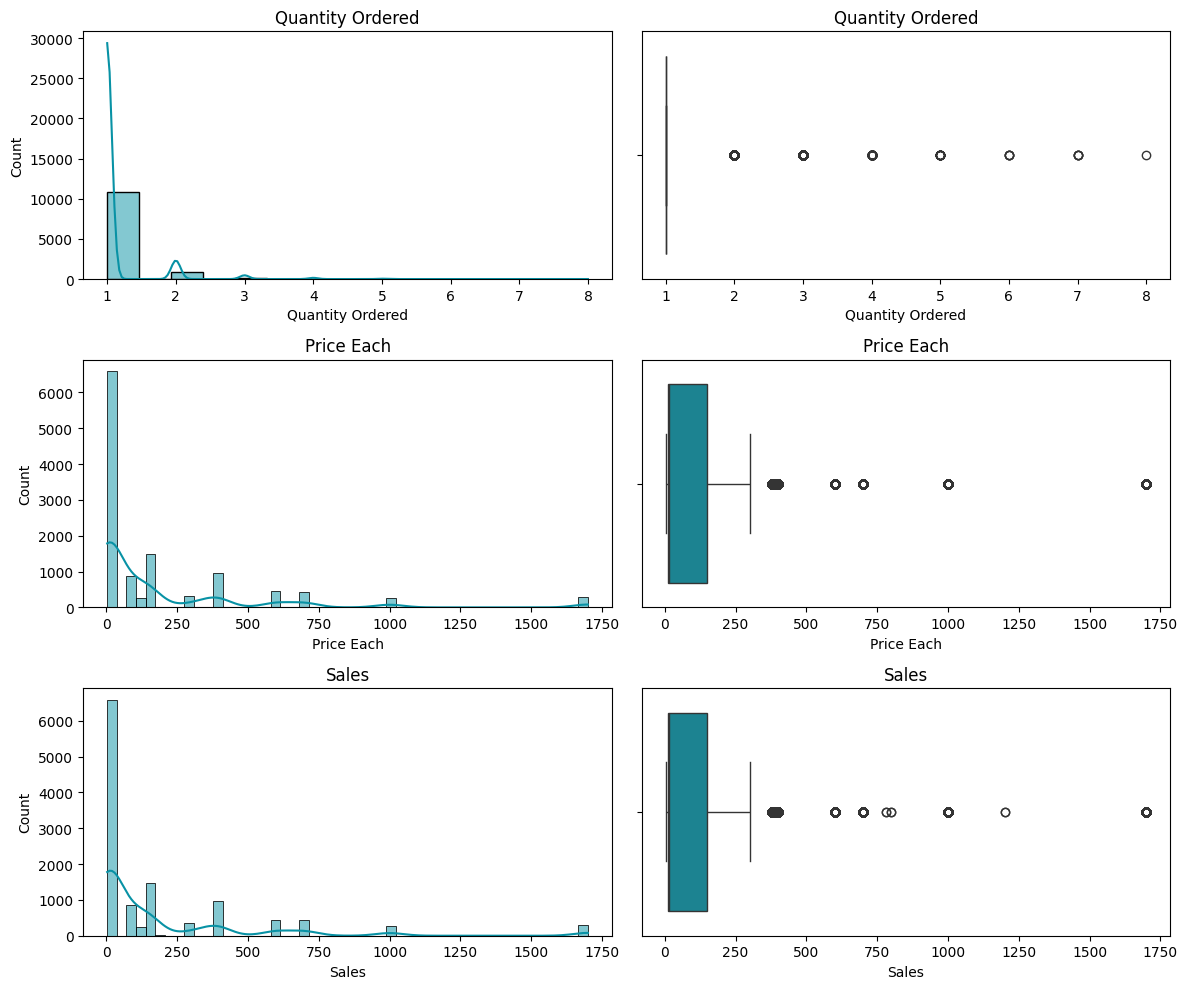

In [27]:
fig, ax = plt.subplots(3,2, figsize=(12,10))
sns.histplot(data=df,x='Quantity Ordered',kde=True,ax=ax[0,0])
sns.histplot(data=df,x='Price Each',kde=True,ax=ax[1,0],bins=50)
sns.histplot(data=df,x='Sales',kde=True,ax=ax[2,0],bins=50)

ax[0,0].set_title('Quantity Ordered')
ax[1,0].set_title('Price Each')
ax[2,0].set_title('Sales')

sns.boxplot(data=df,x='Quantity Ordered',ax=ax[0,1])
sns.boxplot(data=df,x='Price Each',ax=ax[1,1])
sns.boxplot(data=df,x='Sales',ax=ax[2,1])

ax[0,1].set_title('Quantity Ordered')
ax[1,1].set_title('Price Each')
ax[2,1].set_title('Sales')

plt.tight_layout()
plt.show()

Interpretation :
- Mostly customer buys 1 item, some small protion buy 2 items once and customer buys more than 2 is rare.
- Price per item mostly in range 11.95 to 150.00.
- Sales range are 11.95 to 150.00.

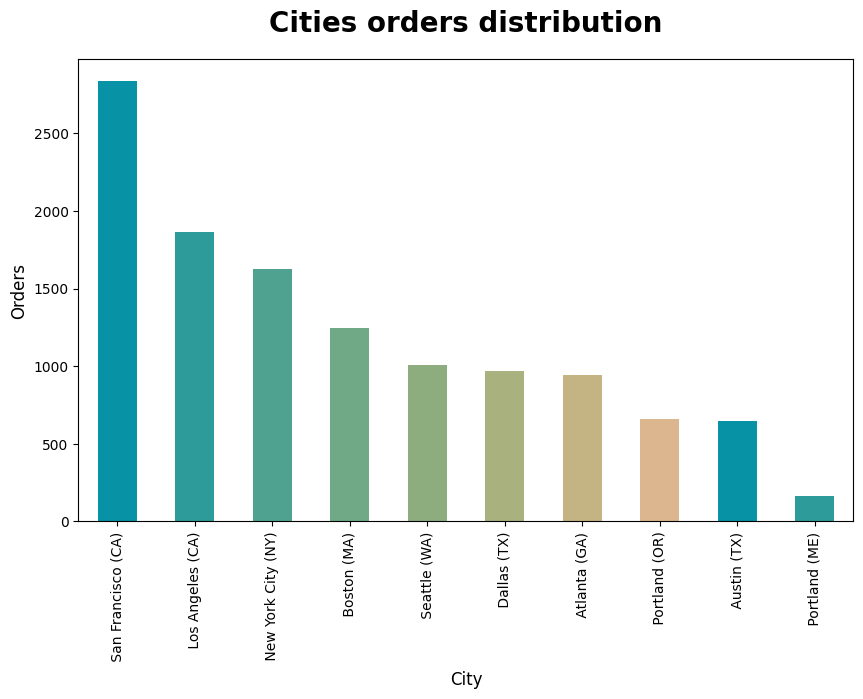

In [28]:
plt.figure(figsize=(10,6))

df['Cities'].value_counts().plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
# sns.countplot(df['Cities'])
plt.title('Cities orders distribution',weight='bold',fontsize=20,pad=20)
plt.ylabel('Orders',fontsize=12)
plt.xlabel('City',fontsize=12)
plt.show()

Most of orders are from California (CA) specificly from San Francisco and Los Angeles around more than 40,000 and 30,000 orders. Average orders in cities are around 18,000 orders.

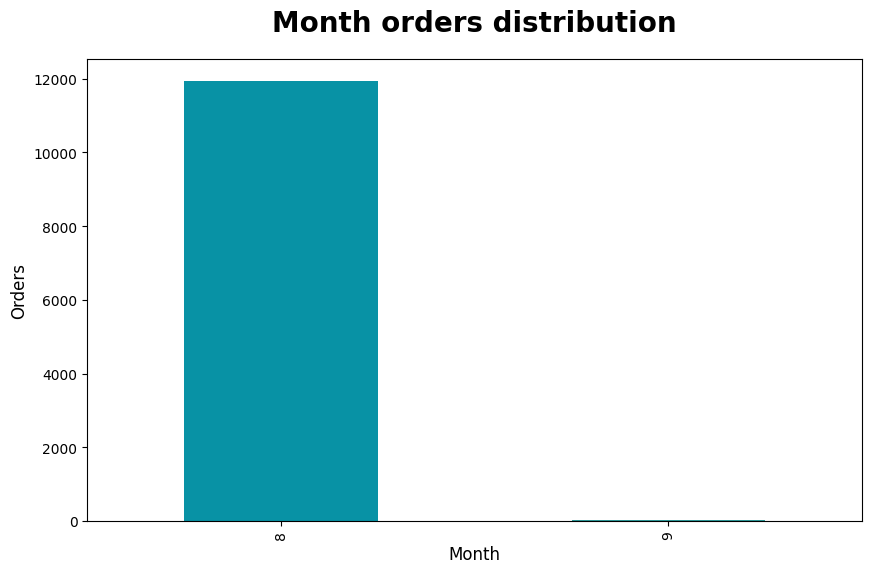

In [29]:
plt.figure(figsize=(10,6))
df['Month'].value_counts().sort_index().plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Month orders distribution',weight='bold',fontsize=20,pad=20)
plt.ylabel('Orders',fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.show()

High order are happend in December and October that have 25,000 and 20,000 orders. There is increasing order in January to April then decrease to September.

## Multivariate Analysis
Multivariate analysis is defined as: The statistical study of data where multiple measurements are made on each experimental unit and where the relationships among multivariate measurements and their structure are important.

In [30]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Year                         int32
Month                        int32
Hour                         int32
Minute                       int32
Sales                      float64
Cities                      object
dtype: object

In [31]:
numeric_df = df.select_dtypes(include='number')

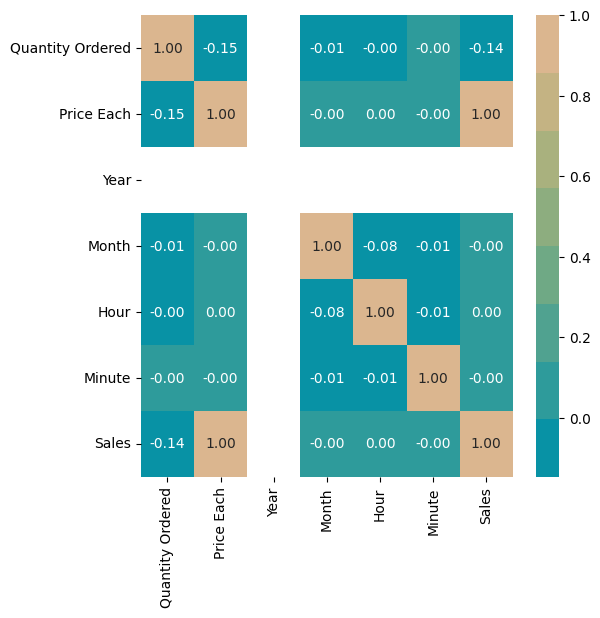

In [32]:
plt.figure(figsize=(6, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap=['#0892a5', '#2e9b9b', '#50a290', '#6fa985', '#8dad7f', '#a9b17e', '#c4b383', '#dbb68f'])
plt.show()


Features have weak correlation

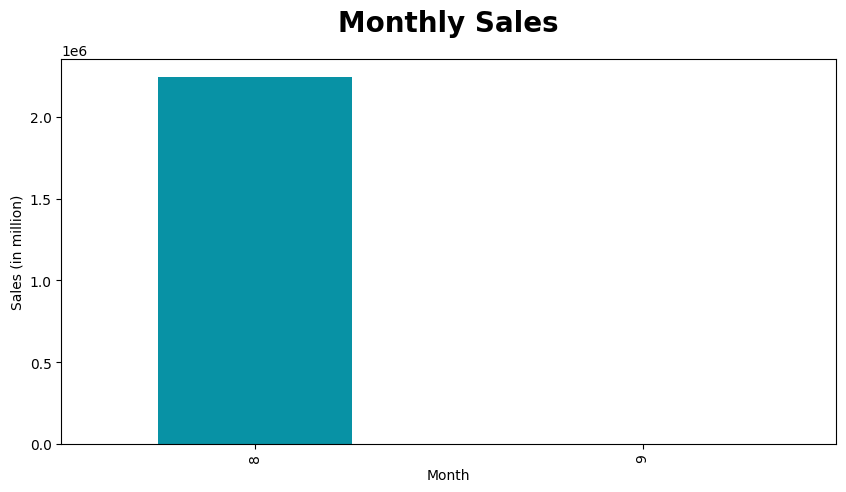

In [33]:
df_month = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10,5))
df_month.plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Monthly Sales',weight='bold',fontsize=20,pad=20)
plt.ylabel('Sales (in million)')
plt.show()

High order are happend in December and October that have 4,5 million and 3,5 million. There is increasing order in January to April then decrease to September.

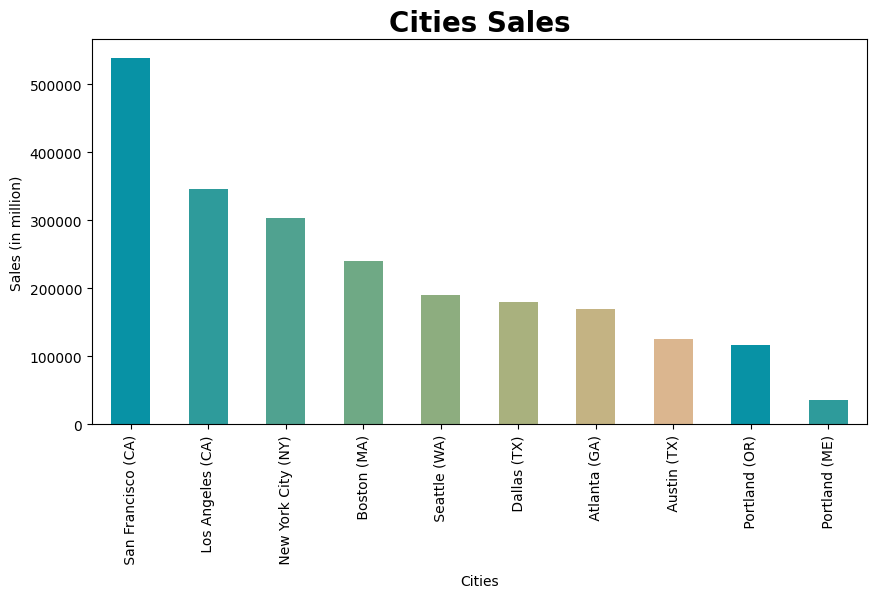

In [34]:
df_city = df.groupby('Cities')['Sales'].sum()
plt.figure(figsize=(10,5))
df_city.sort_values(ascending=False).plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Cities Sales',weight='bold',fontsize=20)
plt.ylabel('Sales (in million)')

plt.show()

Highest sales are from San Francisco around 8,1 million.

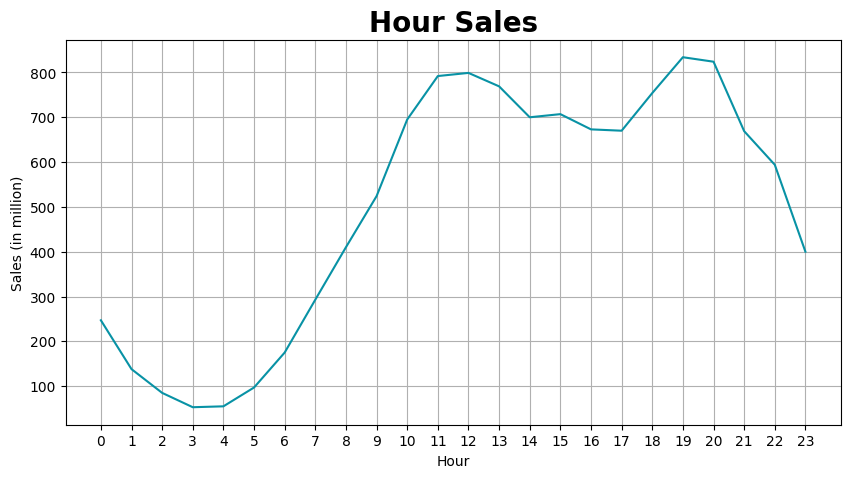

In [35]:
df_hour = df.groupby('Hour')['Quantity Ordered'].count()
plt.figure(figsize=(10,5))
plt.plot(df_hour.index,df_hour.values)
plt.title('Hour Sales',weight='bold',fontsize=20)
plt.grid(True)
plt.xticks(ticks=df_hour.index)
plt.ylabel('Sales (in million)')
plt.xlabel('Hour')


plt.show()


There is peak of sales in around 9:00 to 21:00.

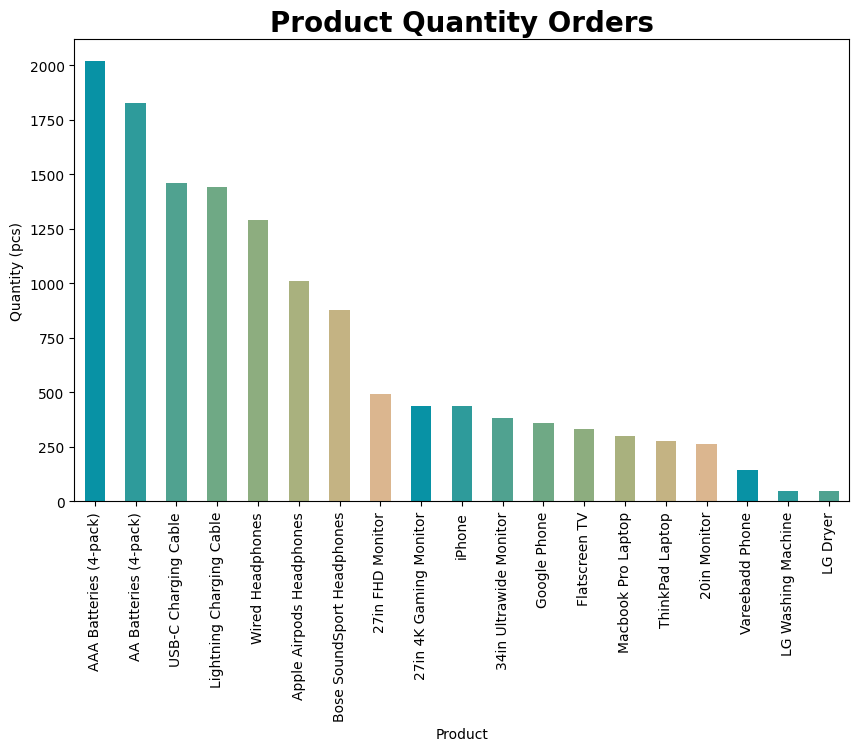

In [36]:
df_product = df.groupby('Product')['Quantity Ordered'].sum()
df_product = df_product.sort_values(ascending=False)

plt.figure(figsize=(10,6))
df_product.plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Product Quantity Orders',weight='bold',fontsize=20)

plt.ylabel('Quantity (pcs)')

plt.show()

Top product sold are on Battery products, then followed by Charging Cable, and Headphones.

## Market basket analysis
Market basket analysis is a data mining technique used by retailers to increase sales by better understanding customer purchasing patterns. It involves analyzing large data sets, such as purchase history, to reveal product groupings, as well as products that are likely to be purchased together.

In [57]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = df[df['Order ID'].duplicated(keep=False)]
# create a new column
data['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# # let's make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()
# # create a new variable for Counter
count = Counter()
# # make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# # and make another for loop
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 66
('Google Phone', 'USB-C Charging Cable') 61
('iPhone', 'Apple Airpods Headphones') 26
('Google Phone', 'Wired Headphones') 23
('Vareebadd Phone', 'USB-C Charging Cable') 22
('iPhone', 'Wired Headphones') 22
('Google Phone', 'Bose SoundSport Headphones') 12
('USB-C Charging Cable', 'Wired Headphones') 9
('Vareebadd Phone', 'Bose SoundSport Headphones') 9
('Vareebadd Phone', 'Wired Headphones') 7


From combination data above we can recommend some bundle for customer to increase sales.
1. iPhone bundle :
   iPhone buyers likely to buy Lightning Charging Cable, Wired Headphones or Apple Airpods Headphones. So in bundle we can give some choices:
     - iPhone + Lightning Charging Cable + Wired Headphones
     - iPhone + Lightning Charging Cable + Apple Airpods Headphones
2. Google Phone Bundle :
   Google Phone buyers likely to buy USB-C Charging Cable, Wired Headphones,Bose SoundSport Headphones. So in bundle we can give some choices:
   - Google Phone + USB-C Charging Cable + Wired Headphones
   - Google Phone + USB-C Charging Cable + Bose SoundSport Headphones

## Purchase Probability

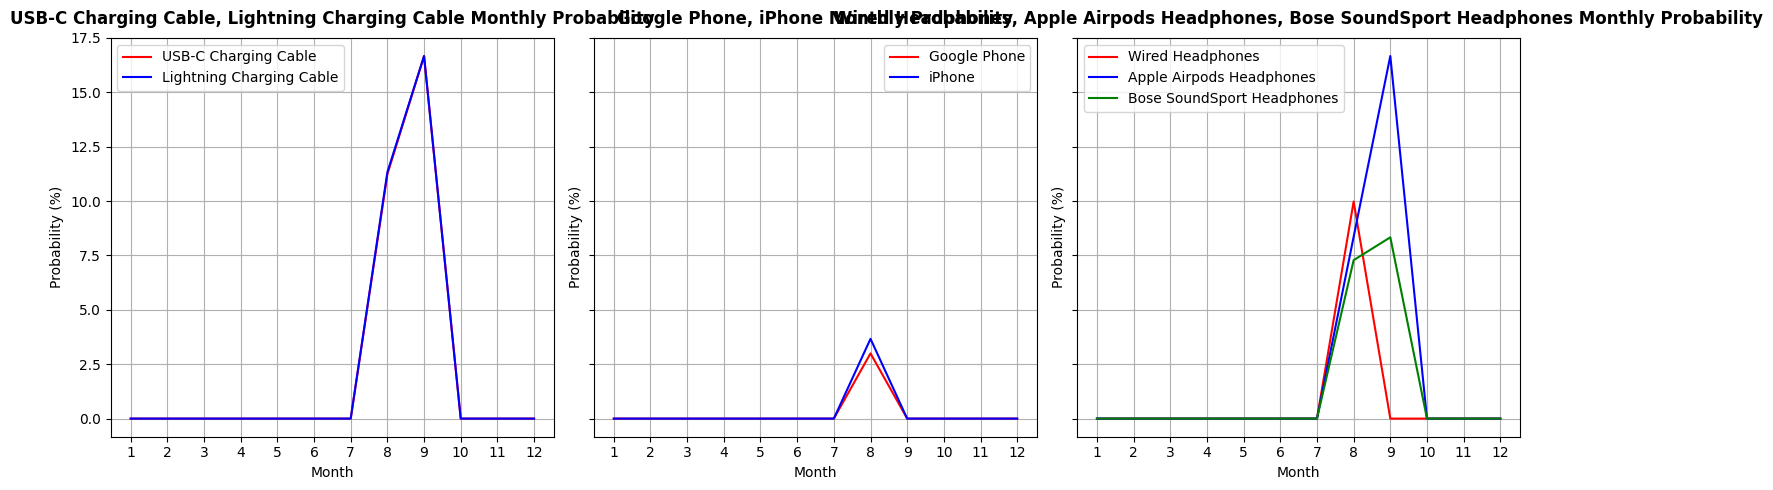

Probability in year for Wired Headphones: 9.97%
Probability in year for Apple Airpods Headphones: 8.36%
Probability in year for Bose SoundSport Headphones: 7.28%


In [58]:
def proba_prod(product, df):
    """
    Calculate the monthly and yearly probabilities for a given product.

    Arguments:
    product -- The name of the product to calculate probabilities for.
    df -- The DataFrame containing the data.

    Returns:
    A tuple (prob_month, prob_year):
    prob_month -- A numpy array of monthly probabilities.
    prob_year -- The yearly probability.
    """
    # Total number of rows in the DataFrame
    total_rows = df.shape[0]

    # Filter the DataFrame for the specified product
    product_df = df[df['Product'] == product]
    product_rows = product_df.shape[0]

    # Calculate yearly probability for the specified product
    prob_year = round(product_rows / total_rows * 100, 2)

    # Initialize lists for monthly calculations
    monthly_probabilities = []

    # Calculate monthly probabilities
    for month in range(1, 13):
        # Total rows in the current month
        monthly_total = df[df['Month'] == month].shape[0]

        # Rows for the current product in the current month
        monthly_product = product_df[product_df['Month'] == month].shape[0]

        # Calculate monthly probability
        if monthly_total == 0:
            monthly_probabilities.append(0)  # Handle division by zero gracefully
        else:
            monthly_probability = round((monthly_product / monthly_total) * 100, 3)
            monthly_probabilities.append(monthly_probability)

    # Convert list of monthly probabilities to a numpy array
    prob_month = np.array(monthly_probabilities)

    return prob_month, prob_year
# Define the list of products to analyze
products = [
    'USB-C Charging Cable', 'Lightning Charging Cable', 'Google Phone', 'iPhone',
    'Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'
]

# Create a row of three subplots with shared y-axis
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Define the colors for plotting
colors = ['r', 'b', 'g']

# Define the pairs (or triplets) of products for each subplot
subplots_products = [
    ['USB-C Charging Cable', 'Lightning Charging Cable'],
    ['Google Phone', 'iPhone'],
    ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones']
]

# Iterate through each subplot and each set of products
for i, (products, ax) in enumerate(zip(subplots_products, axes)):
    for j, product in enumerate(products):
        prob_month, prob_year = proba_prod(product, df)

        # Plot monthly probabilities
        ax.plot(range(1, 13), prob_month, label=product, color=colors[j])

    # Set plot title, labels, and grid
    ax.set_title(f'{", ".join(products)} Monthly Probability', weight='bold', fontsize=12, pad=10)
    ax.set_xticks(range(1, 13))
    ax.set_xlabel('Month')
    ax.set_ylabel('Probability (%)')
    ax.grid(True)
    ax.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Print yearly probabilities for each product
for product in products:
    prob_month, prob_year = proba_prod(product, df)
    print(f'Probability in year for {product}: {prob_year}%')

Probability for next customer will order the product are different for each products, so i simplify based on product type:
1. Charging cable <br>
    USB-C and Lightning cable have close probability which is aroung 11%
2. Phones <br>
    iPhone have higher chances to get orders than Google Phones.
3. Headphones <br>
    From 3 types of Headphones, Wired, Apple Airpods and Bose. Wired Headphones have highest probability to get ordered on next customer.

# Summary

In [59]:
print(f'Total orders in 2019 : {total_year_order:,} orders')
print(f'Total products sold in 2019 : {total_product_sold:,} items')
print(f'Total sales in 2019 : {total_year_sales:,} USD')

Total orders in 2019 : 11,957 orders
Total products sold in 2019 : 13,442 items
Total sales in 2019 : 2,244,412.3099999996 USD


Analysis result for E-commerce sales data :
1. Summary metrics :
    - Total orders in 2019 : 185,916 orders
    - Total products sold in 2019 : 209,038 items
    - Total sales in 2019 : 34,483,365.68 USD
    - Sales range are 11.95 to 150.00.
    - Most of orders are from San Francisco (CA) with 40,000 orders and 8,1 million sales.
    - Average orders in cities are around 18,000 orders.
    

2. Customer behavior :
    - Mostly customer order 1 item, some small protion buy 2 items once and customer buys more than 2 is rare.
    - There is peak of sales in around 9:00 to 21:00. This data can be potentialy became support to post advertising on that time.
    - Most product sold are on Battery products, then followed by Charging Cable, and Headphones.
    - High sales are happend in December that have 25,000 orders and 4,5 million sales . There is increasing order in January to April then decrease to September.
3. Bundle recommendation to increasing sales :
    * iPhone bundle :
       iPhone buyers likely to buy Lightning Charging Cable, Wired Headphones or Apple Airpods Headphones. So in bundle we can give some choices:
         - iPhone + Lightning Charging Cable + Wired Headphones
         - iPhone + Lightning Charging Cable + Apple Airpods Headphones
    * Google Phone Bundle :
       Google Phone buyers likely to buy USB-C Charging Cable, Wired Headphones,Bose SoundSport Headphones. So in bundle we can give some choices:
       - Google Phone + USB-C Charging Cable + Wired Headphones
       - Google Phone + USB-C Charging Cable + Bose SoundSport Headphones
       
4. Probability order on product type:
    - Charging cable <br>
    USB-C and Lightning cable have close probability which is around 11%
    - Phones <br>
    iPhone have higher chances to get orders (3.68%) than Google Phones (2.97%).
    - Headphones <br>
    From 3 types of Headphones, Wired, Apple Airpods and Bose. Wired Headphones have highest probability (10.16%) to get ordered on next customer.

Charging cable
USB-C and Lightning cable have close probability which is around 11%
Phones
iPhone have higher chances to get orders (3.68%) than Google Phones (2.97%).
Headphones
From 3 types of Headphones, Wired, Apple Airpods and Bose. Wired Headphones have highest probability (10.16%) to get ordered on next customer.